In [1]:
import pandas as pd
visualize_df = pd.read_csv("train.csv")
test_copy = pd.read_csv("test.csv")

In [2]:
visualize_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
visualize_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Visualization of all Data

## Gender

In [4]:
import seaborn as sns
sns.countplot(x="Sex", data=visualize_df)

## Survival Rate

### Gender

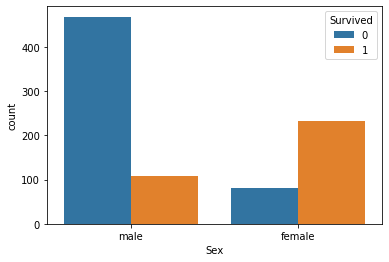

In [5]:
sns.countplot(x="Sex", hue = "Survived", data=visualize_df)

Kinda expected, with all that chivalry and females first.

### PClass

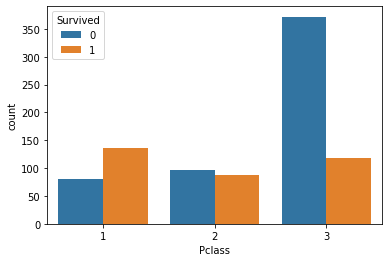

In [6]:
sns.countplot(x="Pclass", hue = "Survived", data=visualize_df)

It seems that everyone within the passenger class of 3 died. I wonder how everyone sorted themselves out during the emergency. 

### Age

[Text(0, 0.5, 'Total'),
 Text(0.5, 0, 'Age Categorical'),
 Text(0.5, 1.0, 'Age Categorical Survival Distribution')]

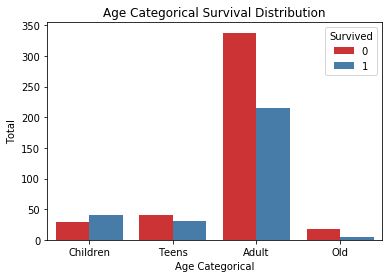

In [7]:
interval = (0,12,18,60,120)
categories = ['Children','Teens','Adult', 'Old']
visualize_df['Age_cats'] = pd.cut(visualize_df.Age, interval, labels = categories)

ax = sns.countplot(x = 'Age_cats',  data = visualize_df, hue = 'Survived', palette = 'Set1')

ax.set(xlabel='Age Categorical', ylabel='Total',
       title="Age Categorical Survival Distribution")

Suprisingly, or not that suprisingly, childrens have the greatest ratio of survived:not survived out of all the other age groups, with the old having the greatest disparity. I guess they all were too slow or just had no will to live any more.

## SibSP - Number of Siblings/Spouses Aboard

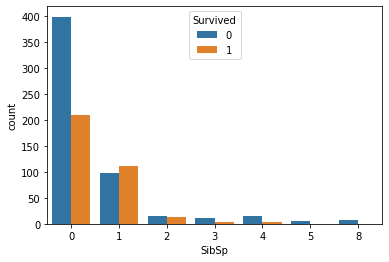

In [8]:
sns.countplot(x="SibSp", hue = "Survived", data=visualize_df)

People with 1 sibling,spouse had the best odds of surviving. I wonder why. 

## Parch - Number of Parents/Children Aboard

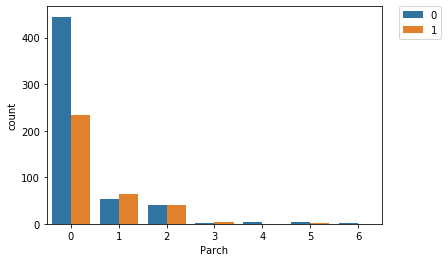

In [9]:
import matplotlib.pyplot as plt

sns.countplot(x="Parch", hue = "Survived", data=visualize_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


We see the same scenario here with people with parents and childrens onboard, similar to SibSp. 

## Embarked

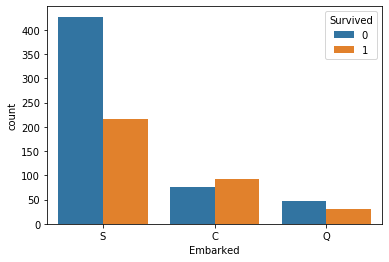

In [10]:
sns.countplot(x="Embarked", hue = "Survived", data=visualize_df)

Embarked here tells you which port they embarked on. Probably shouldn't matter. I suspect those that embarked from C are rich people while those that embark from S are poor people.

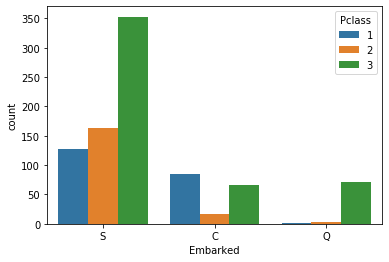

In [11]:
sns.countplot(x="Embarked", hue = "Pclass", data=visualize_df)

Hey, my assumption was right, those that embarked from C had the greatest ratio of rich people from class 1 to poor people from the other 2 classes. Lets take a look at that compared to fare.

## Fare

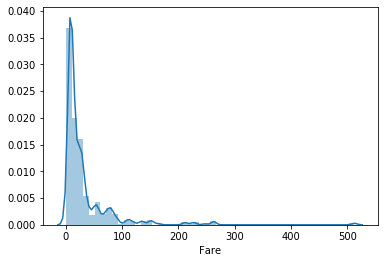

In [12]:
sns.distplot(visualize_df["Fare"])

In [13]:
print("25 percentile of fare is: " + str(visualize_df["Fare"].quantile(0.25)))
print("50 percentile of fare is: " + str(visualize_df["Fare"].quantile(0.5)))
print("75 percentile of fare is: " + str(visualize_df["Fare"].quantile(0.75)))
print("100 percentile of fare is: " + str(visualize_df["Fare"].quantile(1)))

25 percentile of fare is: 7.9104
50 percentile of fare is: 14.4542
75 percentile of fare is: 31.0
100 percentile of fare is: 512.3292


[Text(0, 0.5, 'Total'),
 Text(0.5, 0, 'Price Categorical'),
 Text(0.5, 1.0, 'Price Categorical Survival Distribution')]

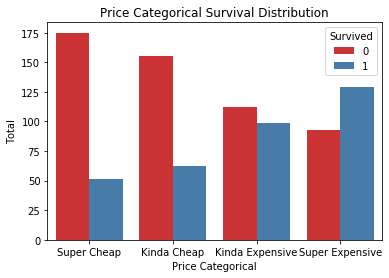

In [14]:
interval = (0,8,15,31,513)
categories = ['Super Cheap','Kinda Cheap','Kinda Expensive', 'Super Expensive']
visualize_df['price_cats'] = pd.cut(visualize_df.Fare, interval, labels = categories)

ax = sns.countplot(x = 'price_cats',  data = visualize_df, hue = 'Survived', palette = 'Set1')

ax.set(xlabel='Price Categorical', ylabel='Total',
       title="Price Categorical Survival Distribution")

Who in the world are these people spending within the top 75th percentile of ticket fares and how are they all surviving?

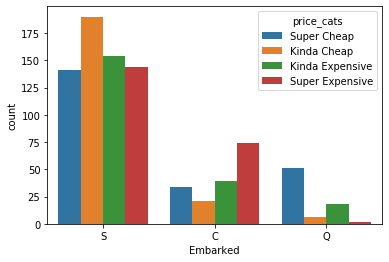

In [15]:
sns.countplot(x="Embarked", hue = "price_cats", data=visualize_df)

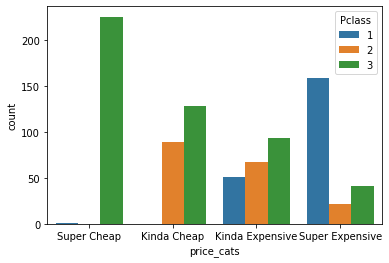

In [16]:
sns.countplot(x="price_cats", hue = "Pclass", data=visualize_df)

Yup. People from C are rich people, and rich people get more odds to survive. As expected, the bourgeoisie gets all the privileges
### Conclusion
To have the best odds of surviving, be a female child and pay lots of money for your ticket fare and be in the first class.

# Preprocessing Time

Time to remove some useless features, I'll take a look at ticket again in the future, but for now the goal is just to get a model up and running

In [17]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [18]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
def missing_values_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percentage = total/df.isnull().count()*100
    percentage = percentage.round(2)
    missing = pd.concat([total, percentage], axis = 1, sort=False, keys = ["Count", "%"])
    return missing

In [20]:
missing_values_table(train_df).head()

,Count,%
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00


In [21]:
missing_values_table(test_df).head()

,Count,%
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Ticket,0,0.00


In [22]:
unique_ticket = pd.unique(pd.Series(train_df["Ticket"])).shape[0]/train_df["Ticket"].count() * 100
print("Percentage of unique tickets: " + str(round(unique_ticket)))

Percentage of unique tickets: 76.0


## Time to delete stuff

PassengerID<br>
Ticket

People online said that <i>Name</i> and <i>Cabin</i> can be used as features so I shall believe them

In [23]:
train_df = train_df.drop(["PassengerId", "Ticket", "Cabin"], axis=1)
test_df = test_df.drop(["PassengerId", "Ticket", "Cabin"], axis=1)

In [24]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


## Now lets fix the NaN values

### Filling in NaN values for embarked

In [25]:
from sklearn.impute import SimpleImputer
import numpy as np


imp_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_frequent.fit(train_df[["Embarked"]])
train_df["Embarked"] = imp_frequent.transform(train_df[["Embarked"]])
test_df["Embarked"] = imp_frequent.transform(test_df[["Embarked"]])
missing_values_table(train_df).head()

,Count,%
Age,177,19.87
Embarked,0,0.00
Fare,0,0.00
Parch,0,0.00
SibSp,0,0.00


### NaN values for Fare in test set

In [26]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_frequent.fit(test_df[["Fare"]])
test_df["Fare"] = imp_frequent.transform(test_df[["Fare"]])
missing_values_table(test_df).head()

,Count,%
Age,86,20.57
Embarked,0,0.00
Fare,0,0.00
Parch,0,0.00
SibSp,0,0.00


### NaN values for Age

In [27]:
imp_frequent.fit(train_df[["Age"]])
train_df["Age"] = imp_frequent.transform(train_df[["Age"]])
test_df["Age"] = imp_frequent.transform(test_df[["Age"]])

missing_values_table(test_df).head()

,Count,%
Embarked,0,0.0
Fare,0,0.0
Parch,0,0.0
SibSp,0,0.0
Age,0,0.0


## Extracting Features from Name<br>

Some chunk of code I found online which is pretty cool.

In [28]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

## Adding new features

Some features I found online

## Age and class

In [29]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

## Relatives

In [30]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']

## Fare per person

In [31]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

## Binning Fare

In [32]:
from sklearn.preprocessing import KBinsDiscretizer

binning = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
binning.fit(train_df[["Fare"]])
pd.DataFrame(binning.transform(train_df[["Fare"]]))
train_df["BinnedFare"] = binning.transform(train_df[["Fare"]])
test_df["BinnedFare"] = binning.transform(test_df[["Fare"]])
train_df = train_df.drop(['Fare'], axis=1)
test_df = test_df.drop(['Fare'], axis=1)

train_df.BinnedFare = train_df.BinnedFare.astype(int)
test_df.BinnedFare = test_df.BinnedFare.astype(int)

## Binning Age

In [33]:
binning = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
binning.fit(train_df[["Age"]])
pd.DataFrame(binning.transform(train_df[["Age"]]))
train_df["BinnedAge"] = binning.transform(train_df[["Age"]])
test_df["BinnedAge"] = binning.transform(test_df[["Age"]])
train_df = train_df.drop(['Age'], axis=1)
test_df = test_df.drop(['Age'], axis=1)

train_df.BinnedAge = train_df.BinnedAge.astype(int)
test_df.BinnedAge = test_df.BinnedAge.astype(int)

In [34]:
train_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_Class,relatives,Fare_Per_Person,BinnedFare,BinnedAge
0,0,3,male,1,0,S,1,66.0,1,3,0,1
1,1,1,female,1,0,C,3,38.0,1,35,2,1
2,1,3,female,0,0,S,2,78.0,0,7,0,1
3,1,1,female,1,0,S,3,35.0,1,26,2,1
4,0,3,male,0,0,S,1,105.0,0,8,0,1


## Label Encoding Sex

In [35]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(train_df[["Sex"]])

C:\Users\khayl\Anaconda3\envs\testenv\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [36]:
train_df["Gender"] = label_encoder.transform(train_df[["Sex"]]) 
test_df["Gender"] = label_encoder.transform(test_df[["Sex"]]) 

C:\Users\khayl\Anaconda3\envs\testenv\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
train_df = train_df.drop(['Sex'], axis=1)
test_df = test_df.drop(['Sex'], axis=1)

In [38]:
train_df.head()

,Survived,Pclass,SibSp,Parch,Embarked,Title,Age_Class,relatives,Fare_Per_Person,BinnedFare,BinnedAge,Gender
0,0,3,1,0,S,1,66.0,1,3,0,1,1
1,1,1,1,0,C,3,38.0,1,35,2,1,0
2,1,3,0,0,S,2,78.0,0,7,0,1,0
3,1,1,1,0,S,3,35.0,1,26,2,1,0
4,0,3,0,0,S,1,105.0,0,8,0,1,1


## Label Encoding Embarked Location

In [39]:
label_encoder.fit(train_df[["Embarked"]])
label_encoder.classes_

array(['C', 'Q', 'S'], dtype=object)

In [40]:
train_df["Embarked"] = label_encoder.transform(train_df[["Embarked"]]) 
test_df["Embarked"] = label_encoder.transform(test_df[["Embarked"]]) 
train_df.head()

,Survived,Pclass,SibSp,Parch,Embarked,Title,Age_Class,relatives,Fare_Per_Person,BinnedFare,BinnedAge,Gender
0,0,3,1,0,2,1,66.0,1,3,0,1,1
1,1,1,1,0,0,3,38.0,1,35,2,1,0
2,1,3,0,0,2,2,78.0,0,7,0,1,0
3,1,1,1,0,2,3,35.0,1,26,2,1,0
4,0,3,0,0,2,1,105.0,0,8,0,1,1


## One Hot Encoding Embarked Location

In [41]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder()
one_hot.fit(train_df[["Embarked"]])
train_data = pd.DataFrame(one_hot.transform(train_df[["Embarked"]]).toarray())
test_data = pd.DataFrame(one_hot.transform(test_df[["Embarked"]]).toarray())

train_df = pd.concat([train_df, train_data], axis = 1)
test_df = pd.concat([test_df, test_data], axis = 1)

C:\Users\khayl\Anaconda3\envs\testenv\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [42]:
for column, column in zip(train_df, test_df):
    if column == 0 or column == 1 or column == 2 or column == "Age_Class":
        train_df[column] =  train_df[column].astype(int)
        test_df[column] =  test_df[column].astype(int)

In [43]:
train_df.head()

,Survived,Pclass,SibSp,Parch,Embarked,Title,Age_Class,relatives,Fare_Per_Person,BinnedFare,BinnedAge,Gender,0,1,2
0,0,3,1,0,2,1,66,1,3,0,1,1,0,0,1
1,1,1,1,0,0,3,38,1,35,2,1,0,1,0,0
2,1,3,0,0,2,2,78,0,7,0,1,0,0,0,1
3,1,1,1,0,2,3,35,1,26,2,1,0,0,0,1
4,0,3,0,0,2,1,105,0,8,0,1,1,0,0,1


## Standard Scaling

# Model Building

Preprocessing took some time. That was tiring.

In [44]:
from sklearn.model_selection import train_test_split

final_test = test_df.copy()
X_train, X_test = train_test_split(train_df, test_size=0.2, random_state=42)

Y_train = X_train.Survived
X_train = X_train.drop(["Survived"], axis=1)

Y_test = X_test.Survived
X_test = X_test.drop(["Survived"], axis=1)

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [47]:
#X_train.head()

## Random Forest Classification

In [48]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=18,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)
random_forest.fit(X_train, Y_train)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

86.8 %


In [51]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(random_forest, X_train, Y_train, cv=10, scoring = "accuracy", verbose = 4)
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.833, total=   2.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] .................................... , score=0.806, total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


[CV] .................................... , score=0.764, total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.6s remaining:    0.0s


[CV] .................................... , score=0.944, total=   0.2s
[CV]  ................................................................
[CV] .................................... , score=0.845, total=   0.2s
[CV]  ................................................................
[CV] .................................... , score=0.775, total=   0.2s
[CV]  ................................................................
[CV] .................................... , score=0.789, total=   0.2s
[CV]  ................................................................
[CV] .................................... , score=0.775, total=   0.2s
[CV]  ................................................................
[CV] .................................... , score=0.814, total=   0.2s
[CV]  ................................................................
[CV] .................................... , score=0.914, total=   0.2s
Scores: [0.83333333 0.80555556 0.76388889 0.94444444 0.84507042 0.77464789
 0

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.2s finished


In [52]:
acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)
print(round(acc_random_forest,2,), "%")

82.68 %


## Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

logisticReg = LogisticRegression()
logisticReg.fit(X_train, Y_train)

acc_logisticReg = round(logisticReg.score(X_train, Y_train) * 100, 2)
print(round(acc_logisticReg,2,), "%")

81.6 %


C:\Users\khayl\Anaconda3\envs\testenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [72]:
from sklearn.model_selection import GridSearchCV


grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,Y_train)

C:\Users\khayl\Anaconda3\envs\testenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\khayl\Anaconda3\envs\testenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\khayl\Anaconda3\envs\testenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\khayl\Anaconda3\envs\testenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\khayl\Anaconda3\envs\testenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver 

C:\Users\khayl\Anaconda3\envs\testenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\khayl\Anaconda3\envs\testenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\khayl\Anaconda3\envs\testenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\khayl\Anaconda3\envs\testenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\khayl\Anaconda3\envs\testenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver 

C:\Users\khayl\Anaconda3\envs\testenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\khayl\Anaconda3\envs\testenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\khayl\Anaconda3\envs\testenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\khayl\Anaconda3\envs\testenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [54]:
scores = cross_val_score(logisticReg, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.83333333 0.81944444 0.75       0.94444444 0.81690141 0.77464789
 0.73239437 0.78873239 0.75714286 0.92857143]
Mean: 0.8145612564274536
Standard Deviation: 0.0683566441513916


C:\Users\khayl\Anaconda3\envs\testenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\khayl\Anaconda3\envs\testenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\khayl\Anaconda3\envs\testenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\khayl\Anaconda3\envs\testenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\khayl\Anaconda3\envs\testenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver 

In [55]:
acc_logisticReg = round(logisticReg.score(X_test, Y_test) * 100, 2)
print(round(acc_logisticReg,2,), "%")

78.21 %


## Support Vector Classifier

In [75]:
from sklearn.svm import SVC

supportClassifier = SVC()
supportClassifier.fit(X_train, Y_train)

acc_supportClassifier = round(supportClassifier.score(X_train, Y_train) * 100, 2)
print(round(acc_supportClassifier,2,), "%")

84.83 %


In [76]:
scores = cross_val_score(supportClassifier, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.84722222 0.80555556 0.76388889 0.94444444 0.87323944 0.76056338
 0.77464789 0.78873239 0.8        0.92857143]
Mean: 0.8286865638274088
Standard Deviation: 0.06357624222410099


C:\Users\khayl\Anaconda3\envs\testenv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\khayl\Anaconda3\envs\testenv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\khayl\Anaconda3\envs\testenv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\khayl\Anaconda3\envs\testenv\li

In [78]:
supportClassifierScore = round(supportClassifier.score(X_test, Y_test) * 100, 2)
print(round(supportClassifierScore,2,), "%")

81.56 %


In [85]:
{'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid_search = GridSearchCV(supportClassifier, param_grid, cv=10)
grid_search.fit(X_train, Y_train)
grid_search.best_params_



{'C': 10, 'gamma': 0.01}

In [86]:
grid_search.best_estimator_ 

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## SVC after hyperparam tuning

In [87]:
supportClassifier = SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
supportClassifier.fit(X_train, Y_train)

acc_supportClassifier = round(supportClassifier.score(X_train, Y_train) * 100, 2)
print(round(acc_supportClassifier,2,), "%")

83.71 %


In [88]:
scores = cross_val_score(supportClassifier, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.86111111 0.80555556 0.75       0.94444444 0.87323944 0.76056338
 0.78873239 0.83098592 0.78571429 0.91428571]
Mean: 0.8314632237871674
Standard Deviation: 0.06204993085258094


In [89]:
supportClassifierScore = round(supportClassifier.score(X_test, Y_test) * 100, 2)
print(round(supportClassifierScore,2,), "%")

81.01 %


# Test Set Processing

In [90]:
Y_prediction = supportClassifier.predict(final_test)

submission = pd.DataFrame({'PassengerId':test_copy['PassengerId'],'Survived':Y_prediction})

#Visualize the first 5 rows
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [91]:
filename = 'Titanic Predictions 1.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Titanic Predictions 1.csv


In [93]:
from sklearn.externals import joblib

joblib.dump(supportClassifier, "supportClassifier.pkl")

['supportClassifier.pkl']

# Final Test Set Accuracy: 0.78468

Pretty Decent